In [1]:
#importing all necessary libraries
import os
import re

#importing libraries needed for data analysis
import numpy as np
import pandas as pd

#importing libraries needed for data visualization
import matplotlib.pyplot as plt

#libraries used for analysing images
import skimage.io
import skimage.feature
import skimage.transform
from glob import glob

In [2]:
train_direc = "./Data/train"
test_direc = "./Data/test"

In [3]:
img_size = (224,224)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./225, 
                                   samplewise_center = True,
                                   samplewise_std_normalization = True,
                                   rotation_range = 0,
                                   horizontal_flip = True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./225)

train_generator = train_datagen.flow_from_directory(train_direc,
                                                    target_size = img_size,
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_direc,
                                                    target_size = img_size,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = False)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [6]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, BatchNormalization,UpSampling2D,GlobalAveragePooling2D,Dropout,Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping,LearningRateScheduler

import tensorflow as tf

In [7]:
import warnings
warnings.filterwarnings('ignore')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

**Here we are using RMSProp as optimizers. Instead if we use Adam it can lead to better accuracy. Also applying batch normalization is also increases the accuracy** 

In [8]:
#supress the warnings
import warnings
warnings.filterwarnings('ignore')

import time
t = time.time()
train_model1 = model.fit_generator(train_generator,steps_per_epoch=6,epochs=25,validation_data=test_generator)
print('Training time: ', (time.time()-t))

Epoch 1/25
6/6 [==============================] - 58s 11s/step - loss: 6.5639 - accuracy: 0.4635 - val_loss: 1.0858 - val_accuracy: 0.6615
Epoch 2/25
6/6 [==============================] - 62s 12s/step - loss: 0.9240 - accuracy: 0.6823 - val_loss: 1.0726 - val_accuracy: 0.6638
Epoch 3/25
6/6 [==============================] - 52s 10s/step - loss: 0.6956 - accuracy: 0.7083 - val_loss: 1.0708 - val_accuracy: 0.2461
Epoch 4/25
6/6 [==============================] - 48s 9s/step - loss: 0.4755 - accuracy: 0.7708 - val_loss: 1.0930 - val_accuracy: 0.2461
Epoch 5/25
6/6 [==============================] - 48s 9s/step - loss: 0.5806 - accuracy: 0.7865 - val_loss: 0.9612 - val_accuracy: 0.2811
Epoch 6/25
6/6 [==============================] - 48s 9s/step - loss: 0.4161 - accuracy: 0.8490 - val_loss: 0.9878 - val_accuracy: 0.5582
Epoch 7/25
6/6 [==============================] - 51s 10s/step - loss: 0.4679 - accuracy: 0.8281 - val_loss: 0.9613 - val_accuracy: 0.6817
Epoch 8/25
6/6 [==============

In [9]:
def plot_losses_and_accuracies(train_model,x):
    epochs = [i for i in range(x)]
    fig , ax = plt.subplots(1,2)
    train_acc = train_model.history['accuracy']
    train_loss = train_model.history['loss']
    val_acc = train_model.history['val_accuracy']
    val_loss = train_model.history['val_loss']
    fig.set_size_inches(25,10)
    ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'b-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

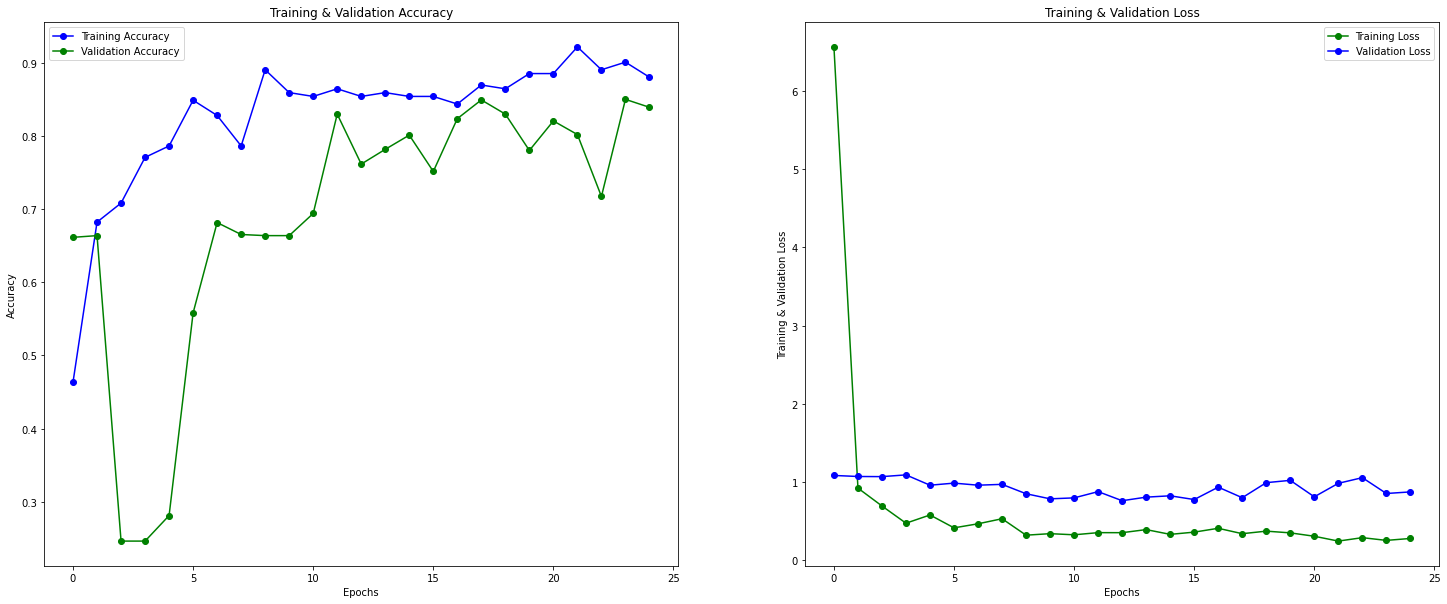

In [11]:
epochs=25
plot_losses_and_accuracies(train_model1,epochs)

In [12]:
scores = model.evaluate_generator(test_generator)

In [13]:
print("Accuracy obtained on test data is: ",scores[1])

Accuracy obtained on test data is:  0.8392857313156128


**Therefore the accuracy has been improved**